In [1]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
from snudda.utils.load import SnuddaLoad

In [2]:
group = "distance"

In [3]:
external = os.path.join("/media","jofrony","2TB","dardel","current_bgd2","population_unit", group, "supercomputer", "networks")

In [4]:
e = Experiments()
e.add_experiment(name="0_p1",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-01-16-03-12_p1.hdf5")
e.add_experiment(name="0_p1_p2",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-01-16-03-32_p1_p2.hdf5")
e.add_experiment(name="45_p1",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-45-3D"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-30-00_p1.hdf5") 
e.add_experiment(name="45_p1_p2",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-45-3D"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-30-08_p1_p2.hdf5")  
e.add_experiment(name="90_p1",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-90-3D"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-31-13_p1.hdf5")

e.add_experiment(name="90_p1_p2",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-90-3D"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-31-13_p1_p2.hdf5")


In [5]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=True)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance/supercomputer/networks/pdc_network_2022-08-31/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-01-16-03-12_p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance/supercomputer/networks/pdc_network_2022-08-31/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-01-16-03-32_p1_p2.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance/supercomputer/networks/pdc_network_2022-08-31-45-3D/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-30-00_p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/pop

In [6]:
neuron_type = "dSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
specific_trace_ids = {k: v[::1] for k, v in specific_trace_ids.items()}
specific_trace_ids

{'0_p1': array([ 8249,  8255,  8269,  8460,  8463,  8476, 10517, 10532, 10598,
        10602, 10603, 10605, 10610, 10611, 10613, 10614, 10617, 10618,
        10623, 10665, 10677, 11916, 11922, 11927, 11931, 11941, 14073,
        14183, 14184, 14192, 14252, 14254, 14255, 14257, 14268, 14329,
        14335, 14383, 14390, 14392, 14393, 14394, 14401, 14440, 15484,
        15489, 15490, 15492, 15495, 15502, 15507, 15592, 15594, 15607,
        15696, 17328, 17346, 17461, 17463, 17468, 17471, 17504, 17555,
        17557, 17559, 17560, 17561, 17572, 17576, 17577, 17578, 17579,
        17580, 18823, 18824, 18825, 18829, 18833, 18839, 18842, 18846,
        18853, 18899, 18913, 18921, 18922, 18923, 18955, 18957, 18959,
        18960, 18963, 18965, 18966, 18968, 18973, 18978, 18980, 19021,
        19022, 19023, 19029, 19036, 19039, 19042, 19045, 19047, 19082,
        19090, 19093, 19095, 19096, 19106, 19107, 19188, 22066, 22069,
        22076, 22093, 22235, 22250, 22291, 24567, 24568, 24569, 24570

In [7]:
max_post = specific_trace_ids["0_p1"].size

In [8]:
%%time
depolarisation_blocked = depolarisation_block(data_obj=sl, specific_trace_ids=specific_trace_ids)
connectivity,_,_ = connectivity_analysis(data_obj=sl, pre=["dSPN", "iSPN", "FS"], post=neuron_type, max_post=max_post, 
                                     test_populations=specific_trace_ids)
frequency_analysis_dict_dspn = frequency_analysis(data_obj=sl, neuron_type=neuron_type, 
                                                  trace_ids=specific_trace_ids, parameters={"start": 0.5, "end": 2.5})

CPU times: user 8min 57s, sys: 1min 26s, total: 10min 24s
Wall time: 14min 32s


In [9]:
%%time
frequency_analysis_dict = {f"{i}" : dict() for i in ["0","45","90"]}
import matplotlib.pyplot as plt
for k in frequency_analysis_dict:
    control = f"{k}_p1"
    p1p2 =  f"{k}_p1_p2"
    d = sl.get_data(name=control)
    d1 = sl.get_data(name=p1p2)
    ids = specific_trace_ids[control]
    for i in ids:
        if frequency_analysis_dict_dspn[control][i] > 0 and frequency_analysis_dict_dspn[p1p2][i] > 0:
            diff = frequency_analysis_dict_dspn[p1p2][i] - frequency_analysis_dict_dspn[control][i]
            frequency_analysis_dict[k].update({i: diff})
            if False:
                plt.figure()
                plt.title(f"{diff} Hz")
                v = d.get_voltage(neuron_id=i)
                plt.plot(v,c="black")
                v1 = d1.get_voltage(neuron_id=i)
                plt.plot(v1,c="red")
                plt.show()
        

CPU times: user 4.38 ms, sys: 59 µs, total: 4.44 ms
Wall time: 5.9 ms


In [10]:
do_feature=False

In [11]:
os = dict()
us = dict()
for ks in ["0","45", "90"]:
    o = dict()
    u = dict()
    for i in frequency_analysis_dict[ks]:

        if i in connectivity[f"{ks}_p1"] and not(depolarisation_blocked[f"{ks}_p1_p2"][i]):

            sums=0
            diffs = frequency_analysis_dict[ks][i]
            for r, k in connectivity[f"{ks}_p1"][i].items():
                sums+=k

            if sums > 500 and diffs < -10 and do_feature:
                u.update({i: dict(num_synapses=sums,diff_Hz=diffs)})

            o.update({i: dict(num_synapses=sums,diff_Hz=diffs)})
    os.update({ks: o})
    us.update({ks: u})

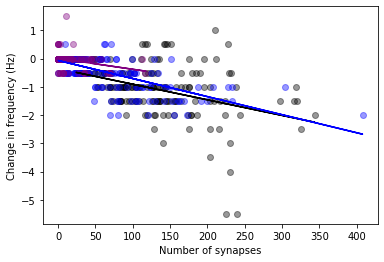

In [12]:
import numpy as np

cs = {"0":"black","45": "blue","90":"purple"}
for k in ["0","45","90"]:
    x = list()
    y = list()
    for i in os[k]:
        plt.scatter([os[k][i]["num_synapses"]],[os[k][i]["diff_Hz"]], c=cs[k],alpha=0.4)
        x.append(os[k][i]["num_synapses"])
        y.append(os[k][i]["diff_Hz"])
        if i in u:
            plt.scatter([us[k][i]["num_synapses"]],[us[k][i]["diff_Hz"]], c=cs[k],alpha=0.4)
    a, b = np.polyfit(x, y, 1)

    #add points to plot
    x = np.array(x)
    #add line of best fit to plot
    plt.plot(x, a*x+b, c=cs[k])
plt.xlabel("Number of synapses")
plt.ylabel("Change in frequency (Hz)")
plt.savefig("Num_synapse_Frequency.svg")

In [13]:
%%time
e_tmps = dict()
for e in ["0","45","90"]:
    tmps = list()
    synapses = sl.experiments[f"{e}_p1"]["network_structure"].data["synapses"]
    for s in [*os[e].keys()]:
        presynaptic = np.where(synapses.T[1] == s)
        
        tmps.append(len(presynaptic[0]))
    e_tmps.update({e: tmps})      
    
        


CPU times: user 1min 26s, sys: 8.81 s, total: 1min 35s
Wall time: 2min 9s


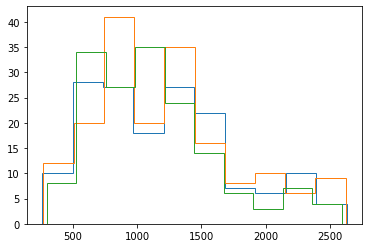

In [14]:
for e in e_tmps:
    plt.hist(e_tmps[e],histtype="step")

In [15]:
%%time
e_tmps = dict()
for e in ["0","45","90"]:
    tmps = list()
    synapses = sl.experiments[f"{e}_p1"]["network_structure"].data["synapses"]
    for s in [*os[e].keys()]:
        presynaptic = np.where(synapses.T[1] == s)
        if len(presynaptic[0]) > 1500:
            tmps.append(s)
    e_tmps.update({e: tmps})      
    
        


CPU times: user 1min 21s, sys: 2.31 s, total: 1min 24s
Wall time: 1min 24s


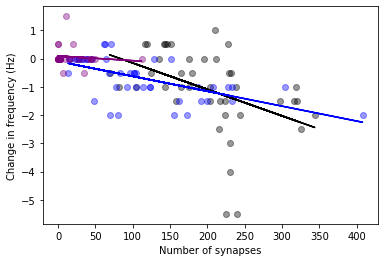

In [16]:
import numpy as np

cs = {"0":"black","45": "blue","90":"purple"}
for k in ["0","45","90"]:
    x = list()
    y = list()
    for i in os[k]:
        
        if i in e_tmps[f"{k}"]:
            plt.scatter([os[k][i]["num_synapses"]],[os[k][i]["diff_Hz"]], c=cs[k],alpha=0.4)
            x.append(os[k][i]["num_synapses"])
            y.append(os[k][i]["diff_Hz"])
            if i in u:
                plt.scatter([us[k][i]["num_synapses"]],[us[k][i]["diff_Hz"]], c=cs[k],alpha=0.4)
    a, b = np.polyfit(x, y, 1)

    #add points to plot
    x = np.array(x)
    #add line of best fit to plot
    plt.plot(x, a*x+b, c=cs[k])
plt.xlabel("Number of synapses")
plt.ylabel("Change in frequency (Hz)")
plt.savefig("Num_synapse_Frequency.svg")

In [17]:
import h5py
import os
with h5py.File(os.path.join("synapses_frequency",f"{group}_synapse_frequency.h5"), 'w') as hf:
    
    hf_add = hf.create_group("depolarisation_blocked")
    for f,data in depolarisation_blocked.items():
        grp = hf_add.create_group(f)
        for i, true_or_false in data.items():
            grp.create_dataset(f"{i}", data=np.array([true_or_false]))
            
    hf_add = hf.create_group("connectivity")
    for f,data in connectivity.items():
        grp = hf_add.create_group(str(f))
        for dest, pre in data.items():
            grps = grp.create_group(str(dest))
            for i, num in pre.items():
                grps.create_dataset(f"{i}", data=np.array([num]))
            
    hf_add = hf.create_group("frequency_analysis_dict_dspn")
    for f,data in frequency_analysis_dict_dspn.items():
        grp = hf_add.create_group(str(f))
        for i, freq in data.items():
            grp.create_dataset(f"{i}", data=np.array([freq]))
            
    
    hf.close()


In [18]:
with h5py.File(os.path.join("synapses_frequency",f"{group}_synapses.h5"), 'w') as f:
        
    for e in ["0","45","90"]:
        synapses = sl.experiments[f"{e}_p1"]["network_structure"].data["synapses"]
        f.create_dataset(f"{e}", data=synapses)
        